In [1]:
# importing libraries needed for project
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# reading in the data for movies
df = pd.read_csv(r'/Users/enriquematias/Data Analysis Projects/movies.csv')

In [31]:
# check to see if the dataset was loaded in

df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,yearrelease
5445,386,5,0,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,388,5,0,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,4909,5,6,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,3643,5,0,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,389,5,0,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018


Observations from the data

There are some missing data due to "NaN"

Will need to try to see the amount of data missing through code to make it faster

In [4]:
for col in df.columns:
    missing_pct = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_pct*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


Finding the Data Types of each column from the database

In [5]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [6]:
# needed to drop NaN values since you cannot change "NaN" into a int64
df = df.dropna()

In [7]:
#removal of decimal point. converting from float to int

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

#kept score as float since average of score can be X.X format

/var/folders/_0/6gmwgj7j0w1gvtw7b4rts0vw0000gn/T/ipykernel_20421/2811216591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget'] = df['budget'].astype('int64')
/var/folders/_0/6gmwgj7j0w1gvtw7b4rts0vw0000gn/T/ipykernel_20421/2811216591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gross'] = df['gross'].astype('int64')
/var/folders/_0/6gmwgj7j0w1gvtw7b4rts0vw0000gn/T/ipykernel_20421/2811216591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [30]:
#confirming the convertion to int

df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,yearrelease
5445,386,5,0,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,388,5,0,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,4909,5,6,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,3643,5,0,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,389,5,0,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018


In [9]:
#adding correct year
#there are some difference in the year between columns 'released' and 'year'

df['yearrelease'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

/var/folders/_0/6gmwgj7j0w1gvtw7b4rts0vw0000gn/T/ipykernel_20421/2950956655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yearrelease'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)


In [29]:
#ordering by rating

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,yearrelease
5445,386,5,0,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,388,5,0,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,4909,5,6,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,3643,5,0,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,389,5,0,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018


In [11]:
#removing duplicates, if any

df['company'].drop_duplicates().sort_values(ascending = False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

In [12]:
#there are different ways in which a company is mentioned in the data. In example, Walt disney could be mentioned as 'Walt Disney Animation Studio' or 'Walt Disney Animations'

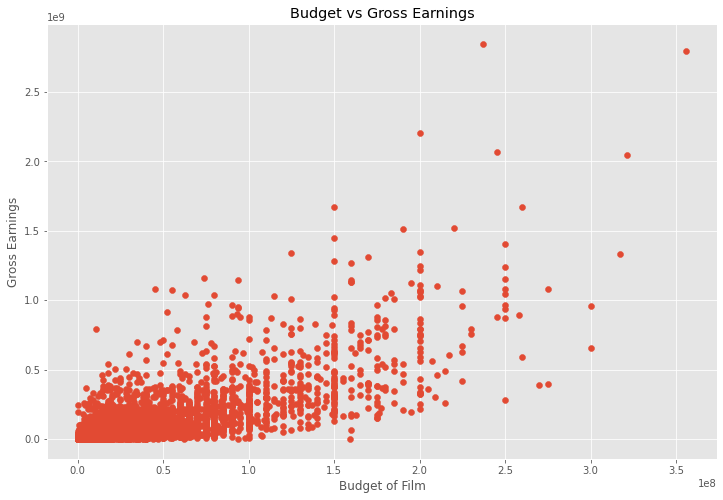

In [13]:
#correlation example 1
#budget may give higher revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget of Film")
plt.ylabel("Gross Earnings")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

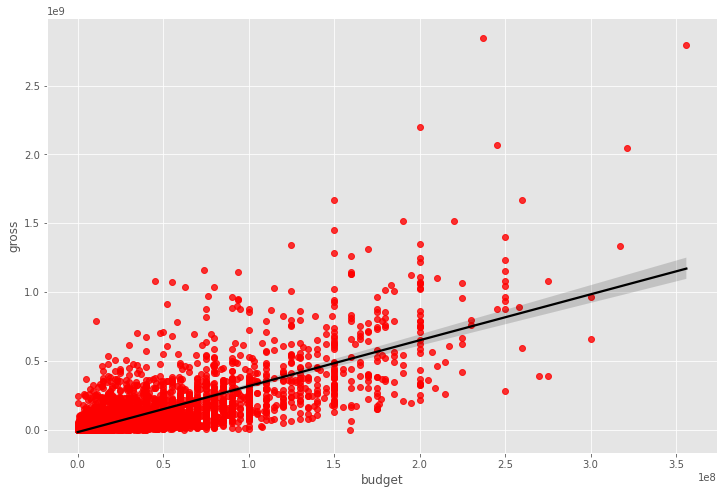

In [14]:
#addint regression line

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"black"})

In [15]:
#correlation
correlations = df.corr(method="pearson")
print(correlations)

                 year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.327722  0.274321  0.075077   
score        0.056386  1.000000  0.474256  0.072001  0.222556  0.414068   
votes        0.206021  0.474256  1.000000  0.439675  0.614751  0.352303   
budget       0.327722  0.072001  0.439675  1.000000  0.740247  0.318695   
gross        0.274321  0.222556  0.614751  0.740247  1.000000  0.275796   
runtime      0.075077  0.414068  0.352303  0.318695  0.275796  1.000000   
yearrelease  0.998726  0.061923  0.203098  0.320312  0.268721  0.075294   

             yearrelease  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.320312  
gross           0.268721  
runtime         0.075294  
yearrelease     1.000000  


In [16]:
#removal of un-used columns to make matrix cleaner
del df['year']
del df['released']

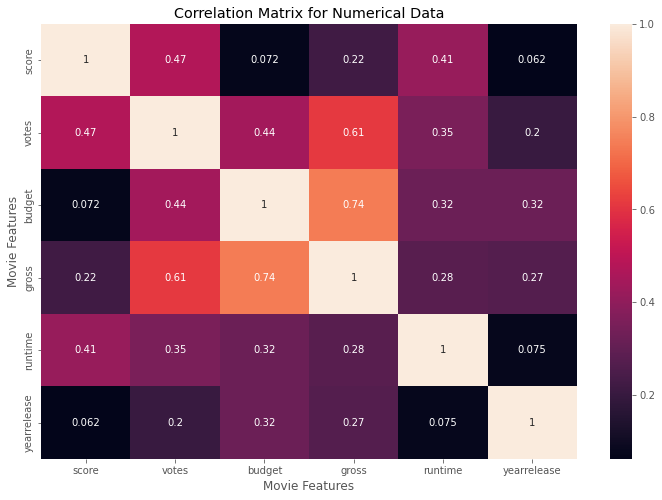

In [17]:
#making heatmap fo correlations
correlations = df.corr(method="pearson")

sns.heatmap(correlations, annot=True)
plt.title("Correlation Matrix for Numerical Data")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [28]:
#Looking at correlations of non numberical data

df_num = df

#numberizing non numberical data using .cat.codes
for col_name in df_num.columns:
    if(df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes
        
df_num.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,yearrelease
5445,386,5,0,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,388,5,0,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,4909,5,6,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,3643,5,0,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,389,5,0,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018


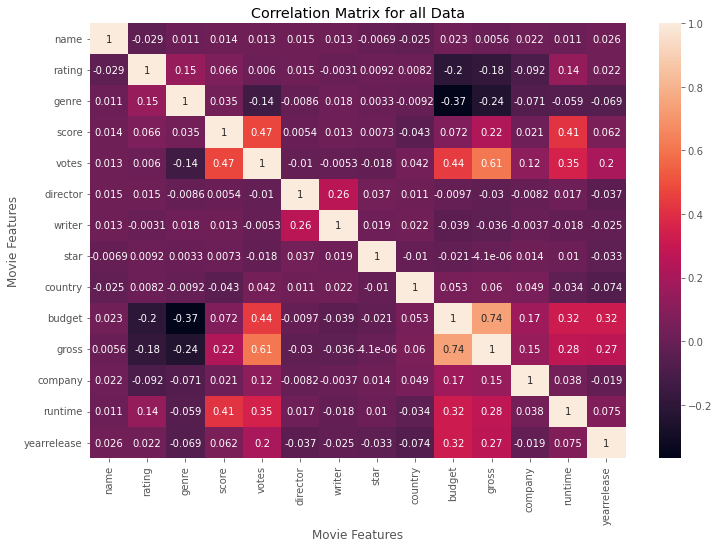

In [27]:
#Matrix of all data

correlations = df_num.corr(method="pearson")

sns.heatmap(correlations, annot=True)
plt.title("Correlation Matrix for all Data")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [38]:
df_num.corr()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,yearrelease
name,1.000000,-0.029234,0.010996,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
score,0.014450,0.065983,0.035106,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687
country,-0.025490,0.008230,-0.009164,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,-0.073569
budget,0.023392,-0.203946,-0.368523,0.072001,0.439675,-0.009662,-0.039466,-0.021473,0.052977,1.000000,0.740247,0.170235,0.318695,0.320312


In [21]:
correlation_mat = df_num.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             score          0.014450
             votes          0.012615
                              ...   
yearrelease  budget         0.320312
             gross          0.268721
             company       -0.018806
             runtime        0.075294
             yearrelease    1.000000
Length: 196, dtype: float64

In [25]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
genre        gross         -0.244101
gross        genre         -0.244101
rating       budget        -0.203946
                              ...   
score        score          1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearrelease  yearrelease    1.000000
Length: 196, dtype: float64

In [26]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.614751
votes        gross          0.614751
budget       gross          0.740247
gross        budget         0.740247
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearrelease  yearrelease    1.000000
dtype: float64

In [ ]:
#Votes and Budget have the highest correlation to gross earnings of a movie

#Company has LOW correlation